# Flu Shot Learning- DMA

## Contributors
- Deonte Allen-Gooden
- Sahil Rai

### Import and Read CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

### Data Acquisition 

In [2]:
df_train = pd.read_csv('training_set_features.csv', index_col='respondent_id')
df_test = pd.read_csv('test_set_features.csv',  index_col='respondent_id' )
df_labels = pd.read_csv('training_set_labels.csv',  index_col='respondent_id')

In [3]:
print(df_test.shape)
print(df_train.shape)

(26708, 35)
(26707, 35)


### Preproessing Approach 1 - Deonte Allen-Gooden

#### Issues Found After Data Inspection

- Missing Data
- Outliers
- Inconsistant values


In [4]:
#combine the labels to my train  and test datasets
df_train = df_train.merge(df_labels,  on='respondent_id')
#df_test = df_test.merge(df_labels,  on='respondent_id')

In [5]:
#check for data types in both of my dataets
print(df_train.dtypes)

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [6]:
print(df_test.dtypes)

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [7]:
from sklearn.impute import SimpleImputer

# create an instance of SimpleImputer with "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# fit the imputer to df_train and transform both df_train and df_test
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)


In [8]:
#missing data review
df_train.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

## Encoding and Normalisation - Deonte Allen Gooden
- grouping the data numerical types
- scaling the data

In [9]:
# encodding the string using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

# normalistion on my values using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

ordinal_encoder = OrdinalEncoder()
df_train_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_train.select_dtypes(include=['object'])), 
                                columns=df_train.select_dtypes(include=['object']).columns)
# Combine the encoded features with the numeric features
df_train_encoded = pd.concat([df_train_encoded, df_train.select_dtypes(exclude=['object'])], axis=1)
df_train_encoded = standard_scaler.fit_transform(df_train_encoded)
df_train_encoded


array([[-0.68184881, -2.04427905, -0.22629268, ...,  0.68900552,
        -0.51939056, -0.93342725],
       [ 1.51837305,  1.19702709, -0.22629268, ...,  0.39340041,
        -0.51939056,  1.07132077],
       [-0.68184881, -0.42362598, -0.22629268, ...,  0.68900552,
        -0.51939056, -0.93342725],
       ...,
       [ 0.41826212,  1.19702709, -0.22629268, ...,  0.68900552,
        -0.51939056,  1.07132077],
       [-0.68184881, -0.42362598, -0.22629268, ..., -1.52803281,
        -0.51939056, -0.93342725],
       [-1.78195974, -2.04427905, -0.22629268, ...,  0.68900552,
        -0.51939056, -0.93342725]])

In [10]:
# encodding the string using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
df_test_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_test.select_dtypes(include=['object'])), 
                                columns=df_test.select_dtypes(include=['object']).columns)
# Combine the encoded features with the numeric features
df_test_encoded = pd.concat([df_test_encoded, df_test.select_dtypes(exclude=['object'])], axis=1)
df_test_encoded = standard_scaler.fit_transform(df_test_encoded)
df_test_encoded


array([[ 0.41667718,  1.19645514, -0.22820155, ..., -0.578243  ,
        -1.06464006, -1.36985515],
       [-0.69252386, -0.43099196, -0.22820155, ..., -0.578243  ,
        -1.06464006,  0.54640333],
       [ 0.41667718,  1.19645514, -0.22820155, ..., -0.578243  ,
         0.57578545, -0.63283266],
       ...,
       [-1.8017249 , -0.43099196, -0.22820155, ..., -0.578243  ,
        -0.51783155,  0.69380783],
       [ 1.52587821, -0.43099196, -0.22820155, ..., -0.578243  ,
        -0.51783155,  0.69380783],
       [ 0.41667718, -0.43099196, -0.22820155, ..., -0.578243  ,
        -0.51783155,  0.69380783]])

## Normalisation Dataset

In [11]:
# normalistion on my values using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_train_normalised = standard_scaler.fit_transform(df_train_encoded)
# Add column labels to the normalized DataFrame
df_train_normalised = pd.DataFrame(df_train_normalised, columns=df_train.columns)

In [12]:
# normalistion on my values using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_test_normalised = standard_scaler.fit_transform(df_train_encoded)
# Add column labels to the normalized DataFrame
df_test_normalised = pd.DataFrame(df_train_normalised, columns=df_train.columns)

# Visualisation - Deonte Allen-Gooden

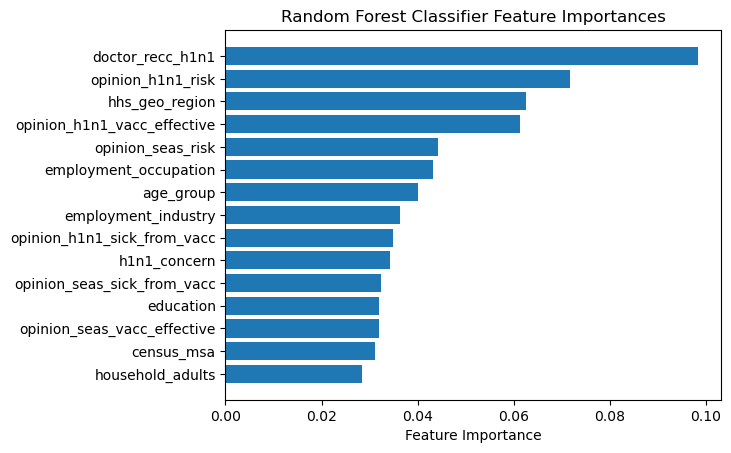

In [32]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features and target variable
X_train = df_train_normalised.drop(['h1n1_vaccine','seasonal_vaccine'], axis =1)
y_h1n1 = df_labels['h1n1_vaccine']
y_seasonal = df_labels['seasonal_vaccine']

# Create a Random Forest Classifier and fit it to the data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_h1n1)

# Get the feature importances
importances = rfc.feature_importances_

# Sort the features by importance
sorted_idx = importances.argsort()[-15:]

plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Classifier Feature Importances")
plt.show()


# Feature Count Plot


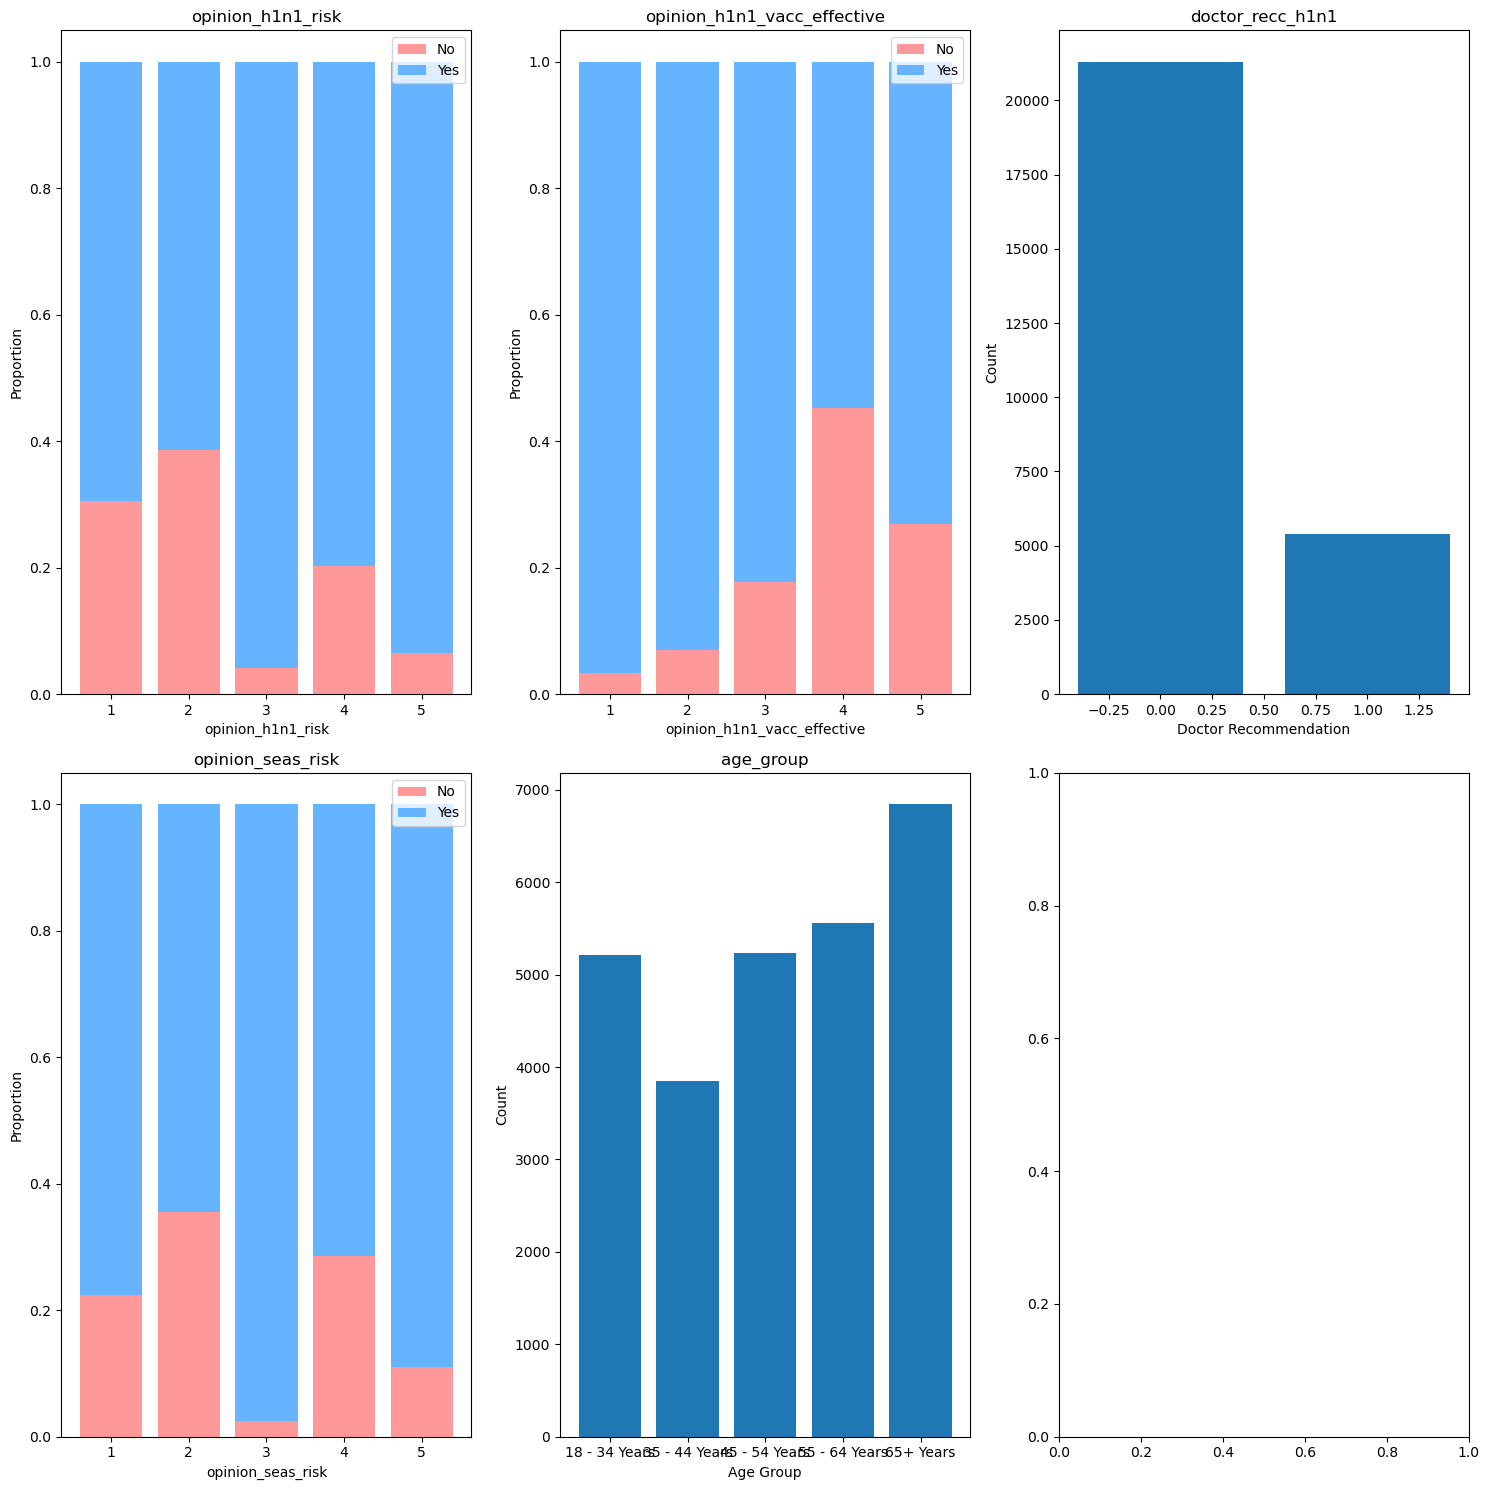

In [15]:
import matplotlib.pyplot as plt

# Define the features for the alternative visualizations
features = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'opinion_seas_risk', 'age_group']

# Set up the grid for subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the features
for i, feature in enumerate(features):
    # Set the subplot location
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    if feature == 'doctor_recc_h1n1':
        # Bar chart for 'doctor_recc_h1n1'
        counts = df_train[feature].value_counts()
        ax.bar(counts.index, counts.values)
        ax.set_xlabel('Doctor Recommendation')
        ax.set_ylabel('Count')
    elif feature == 'age_group':
        # Bar chart for 'age_group'
        counts = df_train[feature].value_counts().sort_index()
        ax.bar(counts.index, counts.values)
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Count')
    else:
        # Stacked bar chart for other features
        counts = df_train[feature].value_counts(normalize=True).sort_index()
        ax.bar(counts.index, counts.values, label='No', color='#ff9999')
        ax.bar(counts.index, 1 - counts.values, bottom=counts.values, label='Yes', color='#66b3ff')
        ax.set_xlabel(feature)
        ax.set_ylabel('Proportion')
        ax.legend()

    #title 
    ax.set_title(feature)

# Display the alternative visualizations    
plt.tight_layout()
plt.show()


# Classification - Deonte Allen-Gooden

# KNN Classifier

In [16]:
# set up the data using the KNN classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## KNN Parameter Evaluation/ Tuning

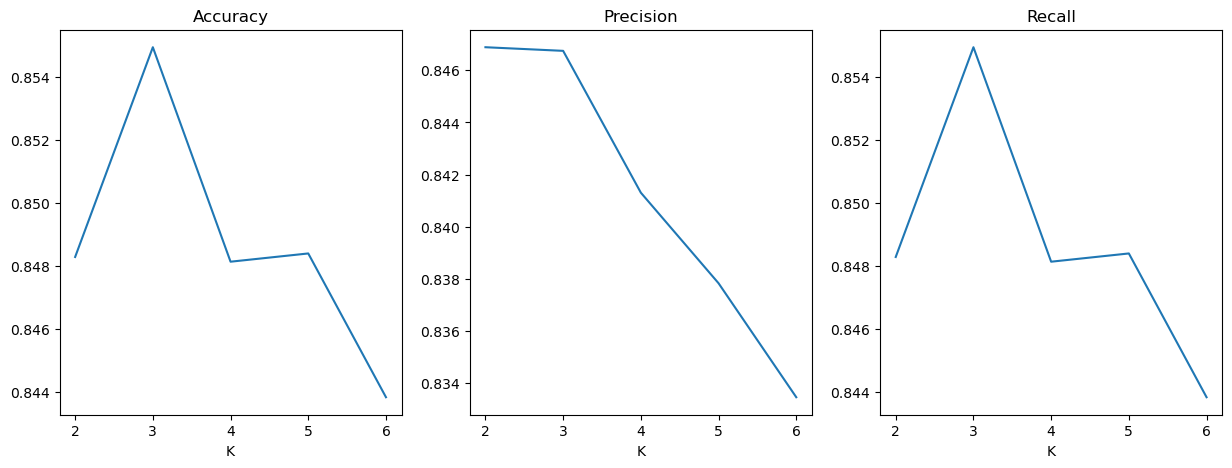

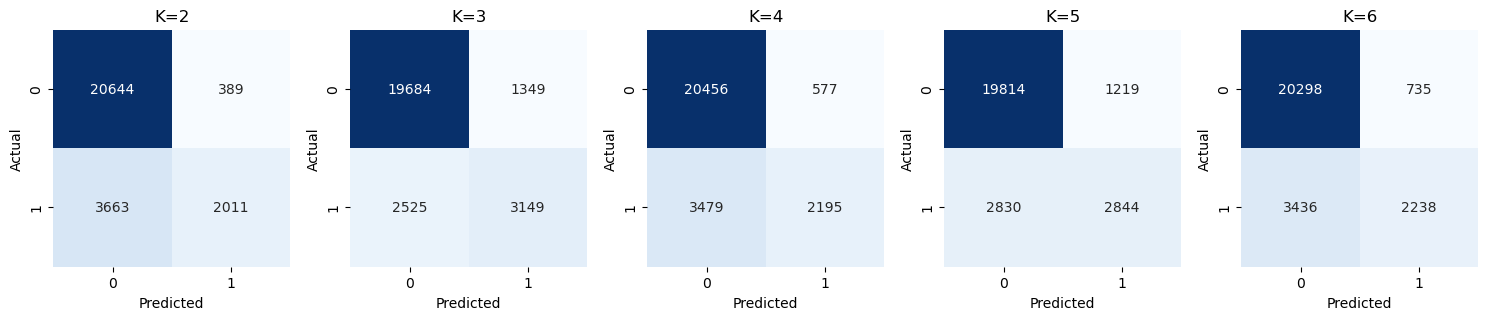

In [17]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select subset of features
attributes = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'hhs_geo_region',
              'opinion_seas_risk', 'employment_industry', 'age_group']


X_train = df_train_normalised[attributes]
y_train_h1n1 = df_labels['h1n1_vaccine'].map({0: 0, 1: 1})
y_train_seasonal = df_labels['seasonal_vaccine'].map({0: 0, 1: 1})
X_test = df_test_normalised[attributes]
y_test_h1n1 = df_labels['h1n1_vaccine'].map({0: 0, 1: 1})
y_test_seasonal = df_labels['seasonal_vaccine'].map({0: 0, 1: 1})


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define range of K values
k_values = range(2, 7)

# Initialize arrays
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

#KNN classification for each value of K
for i, k in enumerate(k_values):
   
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train_h1n1)
    
   
    y_pred_h1n1 = knn.predict(X_test)
    
    # Compute evaluation metrics for H1N1 vaccine
    accuracy[i] = accuracy_score(y_test_h1n1, y_pred_h1n1)
    precision[i] = precision_score(y_test_h1n1, y_pred_h1n1, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test_h1n1, y_pred_h1n1, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test_h1n1, y_pred_h1n1))
    
# Plot 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [0,1] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()


In [18]:
# declare features
features = ['opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'hhs_geo_region','opinion_seas_risk','employment_industry','age_group']

# convert the target variables to binary values (0 or 1)
y_h1n1 = df_labels['h1n1_vaccine'].map({0: 0, 1: 1})
y_seasonal = df_labels['seasonal_vaccine'].map({0: 0, 1: 1})

In [19]:
print(df_labels['h1n1_vaccine'].unique())
print(df_labels['seasonal_vaccine'].unique())

[0 1]
[0 1]


In [20]:
# knn classifier
KNN = KNeighborsClassifier(n_neighbors=3)

# fit the classifier 
KNN.fit(X_train, y_train_h1n1)
y_pred_h1n1 = KNN.predict(X_test)

# calculate the accuracy of the classifier for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)

# fit the classifier
KNN.fit(X_train, y_train_seasonal)
y_pred_seasonal = KNN.predict(X_test)

# calculate the accuracy of the classifier for seasonal flu vaccine
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)


Accuracy for H1N1 vaccine: 0.8549443966001423
Accuracy for seasonal flu vaccine: 0.7721196690006366


## KNN ROC Curve

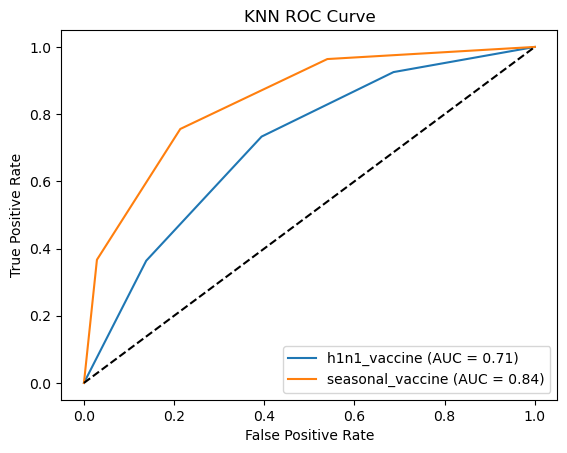

In [21]:
# import libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for H1N1 vaccine seasonal flu vaccine
y_scores_h1n1 = KNN.predict_proba(X_test)[:, 1]
y_scores_seasonal = KNN.predict_proba(X_test)[:, 1]

fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1, y_scores_h1n1)
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal, y_scores_seasonal)

# Calculate AUC for H1N1 vaccine seasonal flu vaccine
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC curves
plt.plot(fpr_h1n1, tpr_h1n1, label='h1n1_vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot(fpr_seasonal, tpr_seasonal, label='seasonal_vaccine (AUC = %0.2f)' % roc_auc_seasonal)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()


## KNN Confusion Matrices

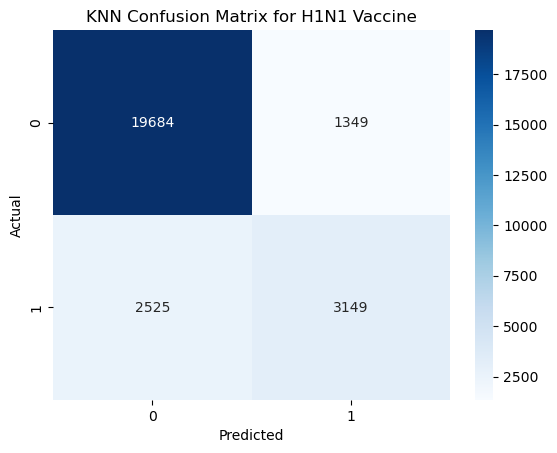

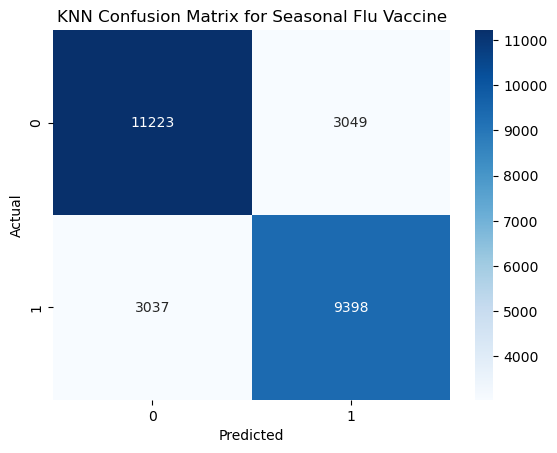

In [22]:
#imports
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for H1N1 vaccine predictions
cm_h1n1 = confusion_matrix(y_test_h1n1, y_pred_h1n1)

# Plot 
sns.heatmap(cm_h1n1, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Confusion Matrix for H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the confusion matrix for seasonal flu vaccine predictions
cm_seasonal = confusion_matrix(y_test_seasonal, y_pred_seasonal)

# Plot
sns.heatmap(cm_seasonal, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Confusion Matrix for Seasonal Flu Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Classification Report - KNN

In [23]:
# imports
from sklearn.metrics import classification_report

# Print the classification report for H1N1 vaccine prediction
print("Classification Report for H1N1 vaccine:")
print(classification_report(y_test_h1n1, y_pred_h1n1))

Classification Report for H1N1 vaccine:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     21033
           1       0.70      0.55      0.62      5674

    accuracy                           0.85     26707
   macro avg       0.79      0.75      0.76     26707
weighted avg       0.85      0.85      0.85     26707



In [24]:
# print the classification report for seasonal flu vaccine prediction
print("Classification Report for seasonal flu vaccine:")
print(classification_report(y_test_seasonal, y_pred_seasonal))

Classification Report for seasonal flu vaccine:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     14272
           1       0.76      0.76      0.76     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



# Gaussian NB Model

In [25]:
from sklearn.naive_bayes import GaussianNB

# Select the relevant features and target variable for H1N1 vaccine prediction
X_train = df_train_normalised[features]
y_train_h1n1 = y_h1n1
y_train_seasonal = y_seasonal
X_test = df_test_normalised[features]
y_test_h1n1 = df_labels["h1n1_vaccine"]
y_test_seasonal = df_labels["seasonal_vaccine"]

# create a Naive Bayes classifier
nb = GaussianNB()

# fit the classifier 
nb.fit(X_train, y_train_h1n1)
y_pred_h1n1 = nb.predict(X_test)

# calculate the accuracy of the classifier for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)

# fit the classifier
nb.fit(X_train, y_train_seasonal)
y_pred_seasonal = nb.predict(X_test)

# calculate the accuracy of the classifier for seasonal flu vaccine
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)


Accuracy for H1N1 vaccine: 0.8072789905268282
Accuracy for seasonal flu vaccine: 0.6965963979481035


# DecisionTreeClasifier - Deonte Allen-Gooden

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Select the relevant features
X_train = df_train_normalised[features]
y_train_h1n1 = y_h1n1
y_train_seasonal = y_seasonal
X_test = df_test_normalised[features]
y_test_h1n1 = df_labels["h1n1_vaccine"]
y_test_seasonal = df_labels["seasonal_vaccine"]

# create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# fit the classifier
dt.fit(X_train, y_train_h1n1)
y_pred_h1n1 = dt.predict(X_test)

# calculate the accuracy of the classifier for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)

# fit the classifier
dt.fit(X_train, y_train_seasonal)
y_pred_seasonal = dt.predict(X_test)

# calculate the accuracy of the classifier for seasonal flu vaccine
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)



Accuracy for H1N1 vaccine: 0.9044070842850189
Accuracy for seasonal flu vaccine: 0.8483169206575055


## Decision Tree ROC Curve

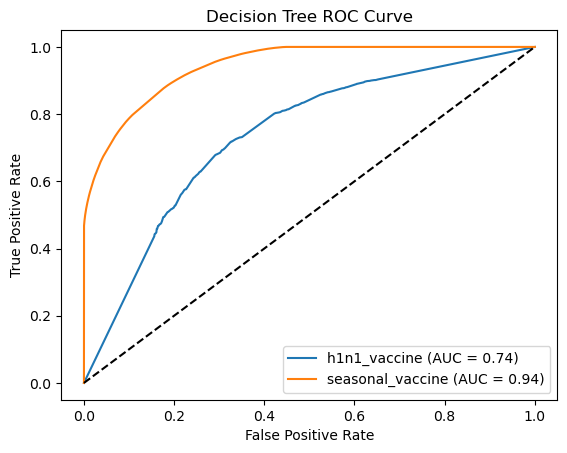

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for H1N1 vaccine seasonal flu vaccine
y_scores_h1n1 = dt.predict_proba(X_test)[:, 1] 
y_scores_seasonal = dt.predict_proba(X_test)[:, 1]


fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test_h1n1, y_scores_h1n1)
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test_seasonal, y_scores_seasonal)

# Calculate AUC for H1N1 vaccine seasonal flu vaccine
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plot ROC curve for H1N1 vaccine seasonal flu vaccine
plt.plot(fpr_h1n1, tpr_h1n1, label='h1n1_vaccine (AUC = %0.2f)' % roc_auc_h1n1)
plt.plot(fpr_seasonal, tpr_seasonal, label='seasonal_vaccine (AUC = %0.2f)' % roc_auc_seasonal)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Decision Tree Confuion Matrices

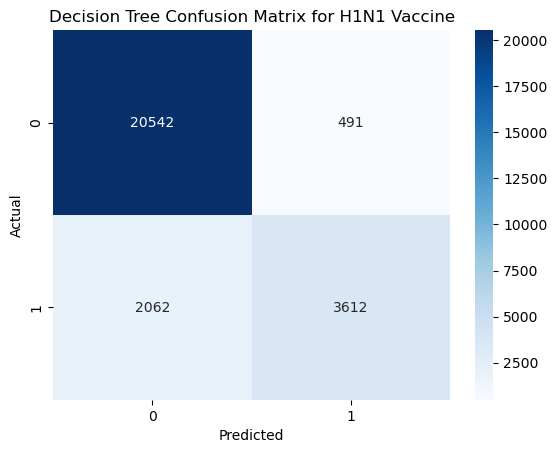

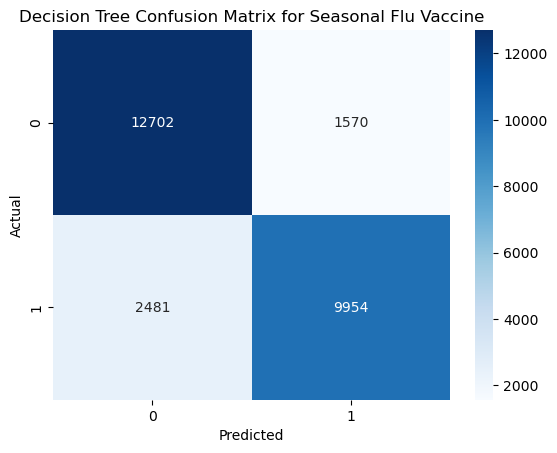

In [35]:
# Calculate the confusion matrix for H1N1 vaccine predictions
cm_h1n1 = confusion_matrix(y_test_h1n1, y_pred_h1n1)

# Plot
sns.heatmap(cm_h1n1, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix for H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the confusion matrix for seasonal flu vaccine predictions
cm_seasonal = confusion_matrix(y_test_seasonal, y_pred_seasonal)

# Plot
sns.heatmap(cm_seasonal, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix for Seasonal Flu Vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Classification Report - DT

In [36]:
from sklearn.metrics import classification_report
# Print the classification report for H1N1 vaccine prediction
print("Classification Report for H1N1 vaccine:")
print(classification_report(y_test_h1n1, y_pred_h1n1))


Classification Report for H1N1 vaccine:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     21033
           1       0.88      0.64      0.74      5674

    accuracy                           0.90     26707
   macro avg       0.89      0.81      0.84     26707
weighted avg       0.90      0.90      0.90     26707



In [37]:
# Print the classification report for seasonal flu vaccine prediction
print("Classification Report for seasonal flu vaccine:")
print(classification_report(y_test_seasonal, y_pred_seasonal))

Classification Report for seasonal flu vaccine:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     14272
           1       0.86      0.80      0.83     12435

    accuracy                           0.85     26707
   macro avg       0.85      0.85      0.85     26707
weighted avg       0.85      0.85      0.85     26707



## Decision Tree Parameter Evaluation

In [39]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV section
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search_h1n1 = GridSearchCV(dt, param_grid, cv=5)
grid_search_seasonal = GridSearchCV(dt, param_grid, cv=5)

# perform grid search for H1N1 vaccine
grid_search_h1n1.fit(X_train, y_train_h1n1)
best_dt_h1n1 = grid_search_h1n1.best_estimator_
y_pred_h1n1 = best_dt_h1n1.predict(X_test)
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)

# print h1n1 results
print("Accuracy for H1N1 vaccine:", accuracy_h1n1)
print("Best hyperparameters for H1N1 vaccine:", grid_search_h1n1.best_params_)

# perform grid search for seasonal flu vaccine
grid_search_seasonal.fit(X_train, y_train_seasonal)
best_dt_seasonal = grid_search_seasonal.best_estimator_
y_pred_seasonal = best_dt_seasonal.predict(X_test)
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)

# print seasonal results
print("Accuracy for seasonal flu vaccine:", accuracy_seasonal)
print("Best hyperparameters for seasonal flu vaccine:", grid_search_seasonal.best_params_)


Accuracy for H1N1 vaccine: 0.82820983262815
Best hyperparameters for H1N1 vaccine: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy for seasonal flu vaccine: 0.724154715992062
Best hyperparameters for seasonal flu vaccine: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# GridSearchCV section
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

grid_search_h1n1 = GridSearchCV(dt, param_grid, cv=5)
grid_search_seasonal = GridSearchCV(dt, param_grid, cv=5)

# grid search for H1N1 vaccine
print("Performing grid search for H1N1 vaccine...")
grid_search_h1n1.fit(X_train, y_train_h1n1)
best_dt_h1n1 = grid_search_h1n1.best_estimator_
y_pred_h1n1 = best_dt_h1n1.predict(X_test)
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
print("Grid search CV results:", grid_search_h1n1.cv_results_)

# H1N1 vaccine results
print("H1N1 vaccine results:")
print("Accuracy:", accuracy_h1n1)
print("Best hyperparameters:", grid_search_h1n1.best_params_)

# grid search for seasonal flu vaccine
print("Performing grid search for seasonal flu vaccine...")
grid_search_seasonal.fit(X_train, y_train_seasonal)
best_dt_seasonal = grid_search_seasonal.best_estimator_
y_pred_seasonal = best_dt_seasonal.predict(X_test)
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
print("Grid search CV results:", grid_search_seasonal.cv_results_)


# seasonal flu vaccine results
print("Seasonal flu vaccine results:")
print("Accuracy:", accuracy_seasonal)
print("Best hyperparameters:", grid_search_seasonal.best_params_)

Performing grid search for H1N1 vaccine...
Grid search CV results: {'mean_fit_time': array([0.0379138 , 0.03329759, 0.0305109 , 0.03578458, 0.03638182,
       0.03231254, 0.03119574, 0.03450994, 0.03211794, 0.01663694,
       0.01496978, 0.01550055, 0.01515884, 0.01587801, 0.01419406,
       0.01396685, 0.01440282, 0.01384935, 0.02202444, 0.0219152 ,
       0.02380881, 0.02096457, 0.02190957, 0.02088614, 0.02213321,
       0.0213665 , 0.02081704, 0.02737174, 0.02963963, 0.02597141,
       0.0268929 , 0.0276463 , 0.04047589, 0.04847064, 0.07417893,
       0.05225811]), 'std_fit_time': array([4.35292892e-03, 1.64567623e-03, 4.59244439e-04, 2.94501567e-03,
       3.09585395e-03, 1.35281827e-03, 8.72971581e-04, 2.99543066e-03,
       3.97504611e-04, 1.52508701e-03, 5.91272969e-04, 4.53968433e-04,
       7.46875711e-04, 3.44150109e-04, 9.63511673e-04, 6.43853554e-04,
       6.05571953e-04, 7.09801839e-04, 5.43263535e-04, 6.53628211e-04,
       5.21886284e-03, 6.14082956e-05, 1.25532788e-03,

Grid search CV results: {'mean_fit_time': array([0.03607411, 0.03412218, 0.03236275, 0.03602166, 0.03392248,
       0.03396859, 0.03160429, 0.0307291 , 0.0317337 , 0.01546531,
       0.01886387, 0.01834526, 0.01635604, 0.01498337, 0.01456118,
       0.01456919, 0.01503868, 0.01477466, 0.0222456 , 0.02196479,
       0.02309079, 0.02411203, 0.02454581, 0.02174153, 0.02418313,
       0.03254399, 0.04194169, 0.04999599, 0.03341856, 0.03206916,
       0.02889037, 0.02965326, 0.02816133, 0.02876763, 0.02990274,
       0.03263044]), 'std_fit_time': array([0.00254317, 0.002545  , 0.00178526, 0.00290993, 0.00107973,
       0.00220123, 0.00075586, 0.00040404, 0.00203422, 0.00146395,
       0.00563482, 0.00203278, 0.00185014, 0.00198233, 0.00101745,
       0.00079188, 0.00158018, 0.00112849, 0.00115615, 0.00094116,
       0.00075008, 0.00159478, 0.00186006, 0.00074658, 0.00246498,
       0.0149054 , 0.00629061, 0.00981018, 0.00205309, 0.00191352,
       0.00106761, 0.00115679, 0.00170202, 0.00094